In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('health care diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
data.shape

(768, 9)

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

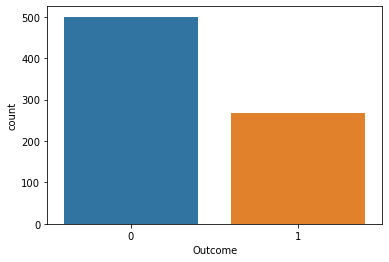

In [46]:
#Countng values of outcomes having 0 or 1, 0 means non diabetic and 1 means diabetic
sns.countplot(x='Outcome',data=data )

In [5]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing Pregnancies: {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows missing Outcome: {0}".format(len(data.loc[data['Outcome'] == 0])))

total number of rows : 768
number of rows missing Pregnancies: 111
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0
number of rows missing Outcome: 500


In [3]:
data['BloodPressure'].replace(0, data['BloodPressure'].mean(), inplace = True)
data['Glucose'].replace(0, data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].replace(0, data['BloodPressure'].mean(), inplace = True)
data['Insulin'].replace(0, data['BloodPressure'].mean(), inplace = True)
data['BMI'].replace(0, data['BloodPressure'].mean(), inplace = True)

In [4]:
print("number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))

number of rows missing Glucose: 0
number of rows missing BloodPressure: 0
number of rows missing SkinThickness: 0
number of rows missing Insulin: 0
number of rows missing BMI: 0


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

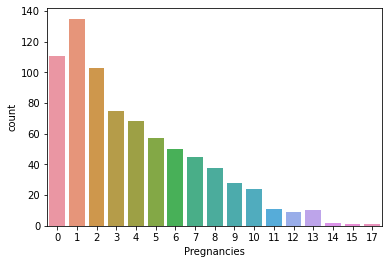

In [75]:
sns.countplot(x= 'Pregnancies', data = data)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

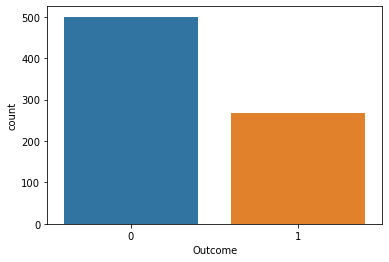

In [89]:
sns.countplot(x= 'Outcome', data = data)

In [ ]:
plt.show()

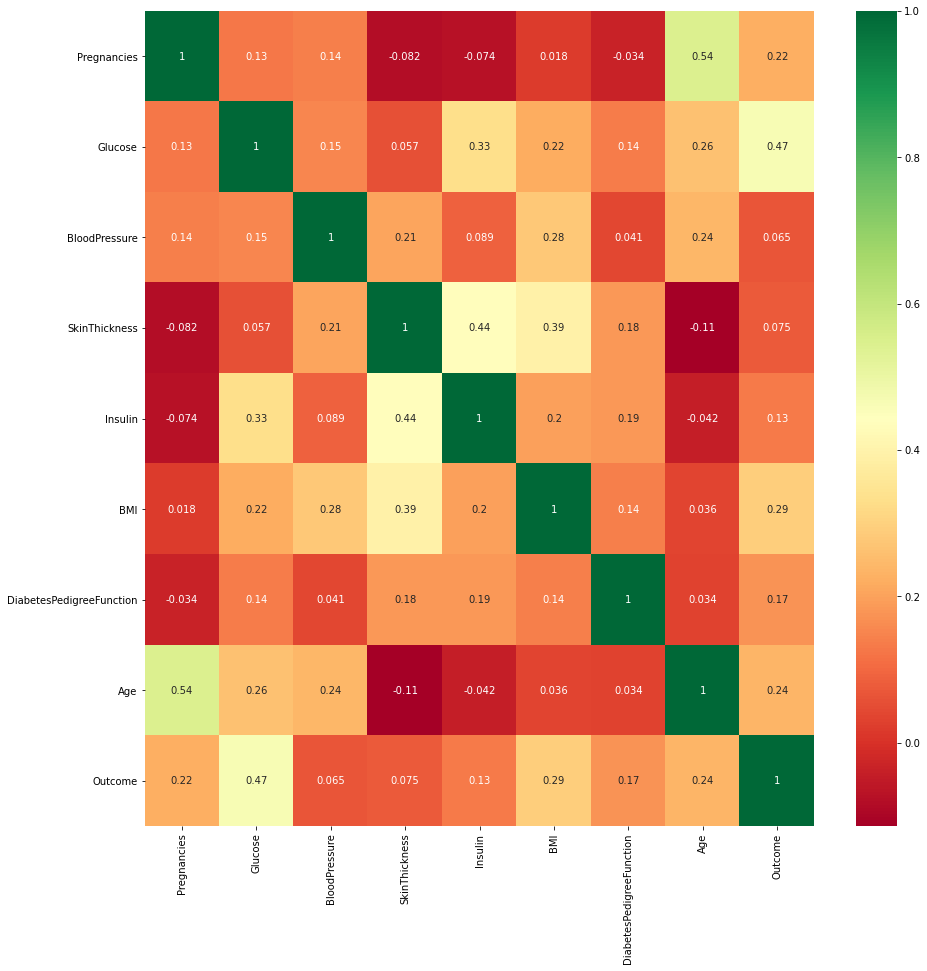

In [38]:
## Correlation
# get correlations of each features in dataset

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,15))

#plot heat map
g = sns.heatmap(data[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [107]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Glucose')

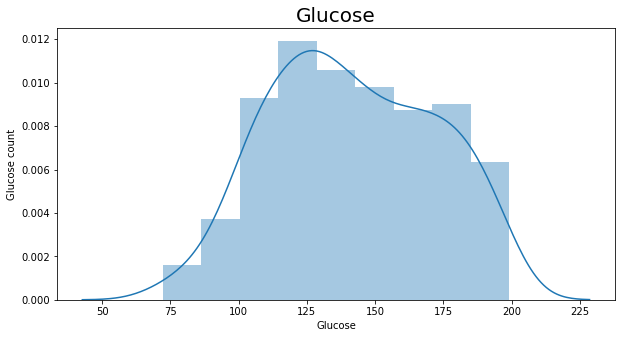

In [110]:
#glucose for diabetic
fig = plt.figure(figsize =(10,5))
sns.distplot(data["Glucose"][data["Outcome"] == 1])
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

Text(0.5, 1.0, 'Insulin')

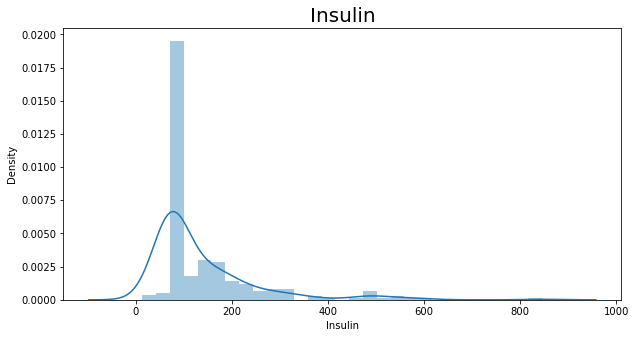

In [111]:
#insulin for diabetic 

fig = plt.figure(figsize = (10,5))
sns.distplot(data["Insulin"][data["Outcome"]==1])
plt.title("Insulin",fontsize = 20)

Text(0.5, 1.0, 'BMI')

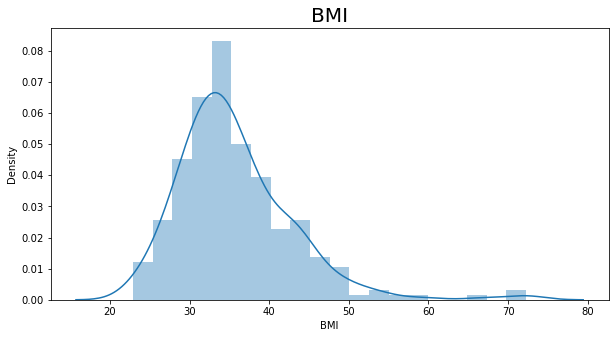

In [112]:
#BMI for diabetic
fig = plt.figure(figsize =(10,5))
sns.distplot(data["BMI"][data["Outcome"]==1])
plt.title("BMI",fontsize = 20)

Text(0.5, 1.0, 'diabetespedigreefunction')

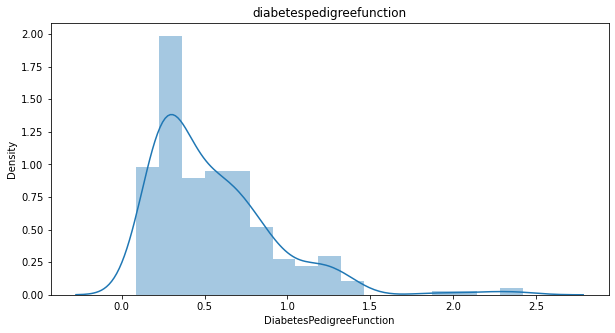

In [113]:
#diabeticpedigreefunction for diabetic

fig = plt.figure(figsize = (10,5))
sns.distplot(data["DiabetesPedigreeFunction"][data["Outcome"] == 1])
plt.title("diabetespedigreefunction")

Text(0.5, 1.0, 'Age')

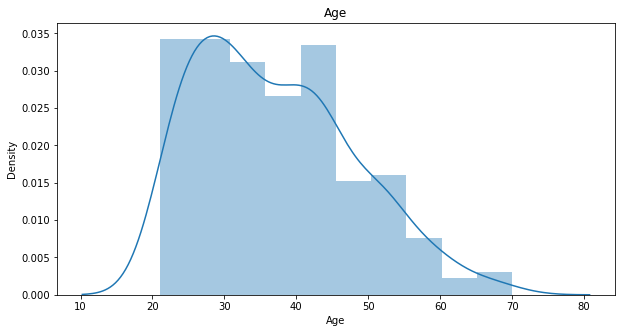

In [114]:
#Age for diabetic
fig = plt.figure(figsize = (10,5))
sns.distplot(data["Age"][data["Outcome"] == 1])
plt.title("Age")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,72.254807,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,72.254807,26.6,0.351,31,0
2,8,183.0,64.0,72.254807,72.254807,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,72.254807,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,72.254807,72.254807,30.1,0.349,47,1


In [9]:
data.drop('BloodPressure', axis = 1)

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,35.000000,72.254807,33.6,0.627,50,1
1,1,85.0,29.000000,72.254807,26.6,0.351,31,0
2,8,183.0,72.254807,72.254807,23.3,0.672,32,1
3,1,89.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,27.000000,72.254807,36.8,0.340,27,0
765,5,121.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,72.254807,72.254807,30.1,0.349,47,1


In [5]:
X = data.iloc[:,: -1].values
Y = data.iloc[:, -1].values

In [7]:
# splitting dataset into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# test)size 0.2 means for testing data 20% and for training data 80%

In [8]:
x_train.shape  # 80% of the original data 

(614, 8)

In [9]:
x_test.shape   # 20% of the original data

(154, 8)

In [10]:
# Feature Scaling - To standardize the independent features present in the data in a fixed range
# If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller 
# values as the lower values, regardless of the unit of the values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model Building KNN Algorithm

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski')

# n_neighbors is 25 because for x_train we got 614 which is near to 25^2
# metric means on what factor choosing so as its KNN so our metric is minkowski i.e., distance

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [10]:
# Predicting the data

knn_y_pred = knn.predict(x_test)
knn_y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

<AxesSubplot:>

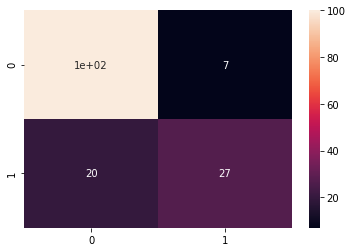

In [11]:
# Confusion matrix - To check how many are correct or wrong

from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot = True)

In [20]:
print(knn_cm)

[[100   7]
 [ 20  27]]


In [ ]:
# The above heatmap says 0,0 means true negative and 1,1 means true positive 
# and 0,1 means even person is negative but showing result positive
# and 1,0 means person is positive but shows negative so its danger so we need to accurate our model

In [12]:
print("Correct:",sum(knn_y_pred==y_test))
print("Incorrect : ",sum(knn_y_pred != y_test))
print("Accuracy:",sum(knn_y_pred ==y_test)/len(knn_y_pred))

Correct: 127
Incorrect :  27
Accuracy: 0.8246753246753247


In [13]:
#Verfying accuracy using inbuilt methods
from sklearn.metrics import accuracy_score
accuracy_score(y_test,knn_y_pred)

0.8246753246753247

# Support Vector Machine

In [14]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [15]:
svc_y_pred = svc.predict(x_test)
svc_y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

<AxesSubplot:>

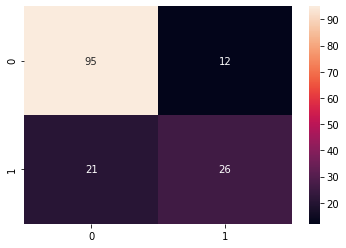

In [16]:
svc_cm = confusion_matrix(y_test, svc_y_pred)
sns.heatmap(svc_cm, annot = True)

In [19]:
print(svc_cm)

[[95 12]
 [21 26]]


In [17]:
print('correct:', sum(svc_y_pred == y_test))
print('incorrct:', sum(svc_y_pred != y_test))
print('accuracy:', sum(svc_y_pred == y_test)/len(svc_y_pred))

correct: 121
incorrct: 33
accuracy: 0.7857142857142857


In [18]:
# Verify accuracy using inbuilt methods

accuracy_score(y_test, svc_y_pred)

0.7857142857142857

# Naive Bias

In [22]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [23]:
nb_y_pred = nb_classifier.predict(x_test)
nb_y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

<AxesSubplot:>

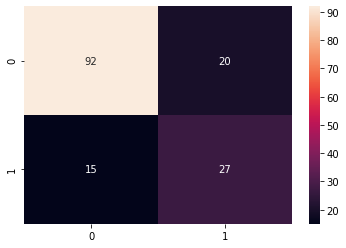

In [25]:
nb_cm = confusion_matrix(nb_y_pred, y_test)
sns.heatmap(nb_cm, annot = True)

In [26]:
print(nb_cm)

[[92 20]
 [15 27]]


In [27]:
print('correct:', sum(nb_y_pred == y_test))
print('incorrect:', sum(nb_y_pred != y_test))
print('accuracy:', sum(nb_y_pred == y_test)/len(nb_y_pred))

correct: 119
incorrect: 35
accuracy: 0.7727272727272727


In [28]:
# Verify accuracy using inbuilt methods

accuracy_score(y_test, nb_y_pred)

0.7727272727272727

# Import the required the models

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Random forest 

In [15]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(x_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [16]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [17]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

# Predition Probability

In [18]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(x_test)
nb_probs = nb.predict_proba(x_test)
knn_probs = knn.predict_proba(x_test)

#Probabilities for the positive outcome is kept

In [19]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]

## Computing AUROC and ROC Curve values 

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

### Calculate AUROC
**ROC** is the reciver operating characteristics and **AUROC** is the area under the ROC curve

In [22]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

## Print AUROC scores

In [23]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('K Nearest Neighbors: AUROC = %.3f' % (knn_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.852
Naive Bayes: AUROC = 0.854
K Nearest Neighbors: AUROC = 0.802


# Calculate ROC curve

In [25]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

In [26]:
nb_fpr, nb_tpr

(array([0.        , 0.        , 0.        , 0.00934579, 0.00934579,
        0.01869159, 0.01869159, 0.02803738, 0.02803738, 0.03738318,
        0.03738318, 0.05607477, 0.05607477, 0.06542056, 0.06542056,
        0.09345794, 0.09345794, 0.11214953, 0.11214953, 0.14018692,
        0.14018692, 0.1682243 , 0.1682243 , 0.18691589, 0.18691589,
        0.19626168, 0.19626168, 0.23364486, 0.23364486, 0.24299065,
        0.24299065, 0.26168224, 0.26168224, 0.28971963, 0.28971963,
        0.29906542, 0.29906542, 0.31775701, 0.31775701, 0.3364486 ,
        0.3364486 , 0.35514019, 0.35514019, 0.46728972, 0.46728972,
        0.4953271 , 0.4953271 , 0.53271028, 0.53271028, 1.        ]),
 array([0.        , 0.0212766 , 0.04255319, 0.04255319, 0.06382979,
        0.06382979, 0.19148936, 0.19148936, 0.27659574, 0.27659574,
        0.44680851, 0.44680851, 0.46808511, 0.46808511, 0.53191489,
        0.53191489, 0.55319149, 0.55319149, 0.57446809, 0.57446809,
        0.59574468, 0.59574468, 0.63829787, 0.

In [27]:
knn_fpr, knn_tpr

(array([0.        , 0.01869159, 0.02803738, 0.14018692, 0.30841121,
        0.58878505, 1.        ]),
 array([0.        , 0.12765957, 0.34042553, 0.59574468, 0.74468085,
        0.93617021, 1.        ]))

# Plot the ROC curve

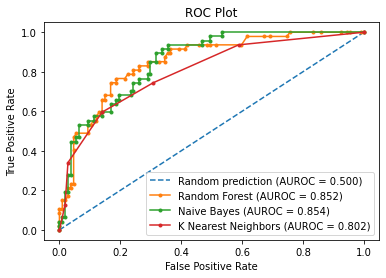

In [28]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K Nearest Neighbors (AUROC = %0.3f)' % knn_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
#plt.show()